In [0]:
import tensorflow as tf

In [2]:
print(tf.__version__)

2.0.0-beta1


In [0]:
import tensorflow_datasets as tfds

In [6]:
imdb, info = tfds.load("imdb_reviews/subwords8k", with_info=True, as_supervised=True)

W0818 20:36:31.069104 139894275970944 dataset_builder.py:439] Warning: Setting shuffle_files=True because split=TRAIN and shuffle_files=None. This behavior will be deprecated on 2019-08-06, at which point shuffle_files=False will be the default for all splits.


In [0]:
train_data, test_data = imdb['train'], imdb['test']

In [0]:
tokenizer = info.features['text'].encoder

In [10]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

In [0]:
sample_string = 'Tensorflow, from basics to mastery'

In [12]:
tokenized_string = tokenizer.encode(sample_string)
print('Tokenizer string is {}'.format(tokenized_string))

Tokenizer string is [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]


In [14]:
original_string = tokenizer.decode(tokenized_string)
print('The original String: {}'.format(original_string))

The original String: Tensorflow, from basics to mastery


In [15]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [0]:
#model
embedding_dim = 64
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(6, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d_1 ( (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [22]:
num_epochs = 10
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_data, epochs=num_epochs, validation_data=test_data)

Epoch 1/10
25000/25000 [==============================] - 520s 21ms/step - loss: 0.6852 - accuracy: 0.5340 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00
Epoch 2/10
25000/25000 [==============================] - 313s 13ms/step - loss: 0.6834 - accuracy: 0.5415 - val_loss: 0.6841 - val_accuracy: 0.5378
Epoch 3/10
25000/25000 [==============================] - 311s 12ms/step - loss: 0.6825 - accuracy: 0.5434 - val_loss: 0.6841 - val_accuracy: 0.5393
Epoch 4/10
25000/25000 [==============================] - 309s 12ms/step - loss: 0.6819 - accuracy: 0.5450 - val_loss: 0.6842 - val_accuracy: 0.5394
Epoch 5/10
25000/25000 [==============================] - 311s 12ms/step - loss: 0.6815 - accuracy: 0.5455 - val_loss: 0.6844 - val_accuracy: 0.5390
Epoch 6/10
25000/25000 [==============================] - 309s 12ms/step - loss: 0.6812 - accuracy: 0.5461 - val_loss: 0.6847 - val_accuracy: 0.5388
Epoch 7/10
25000/25000 [==============================] - 311s 12ms/step - loss: 0.6810 - accuracy

In [23]:
history

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:449: UserWarning: The handle 'u' has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'c' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http:/

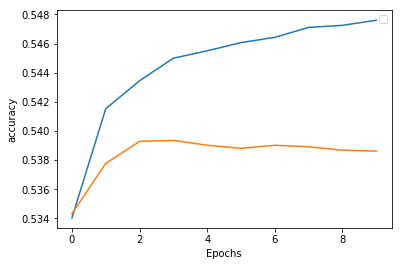

/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:449: UserWarning: The handle 's' has a label of '_' which cannot be automatically added to the legend.
  'legend.'.format(handle, label))
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'l' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 'o' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  "aka-proxy-artists".format(orig_handle)
/usr/local/lib/python3.6/dist-packages/matplotlib/legend.py:798: UserWarning: Legend does not support 's' instances.
A proxy artist may be used instead.
See: http:/

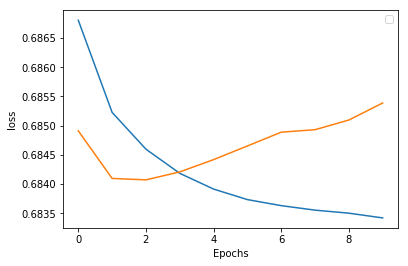

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend(string, 'val_'+string)
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")
  